# Loading Data

In [191]:
from data_utils import _read_data, _fill_missing_values, _feature_engineering, _one_hot_encoding

df = _read_data()

### Distributions

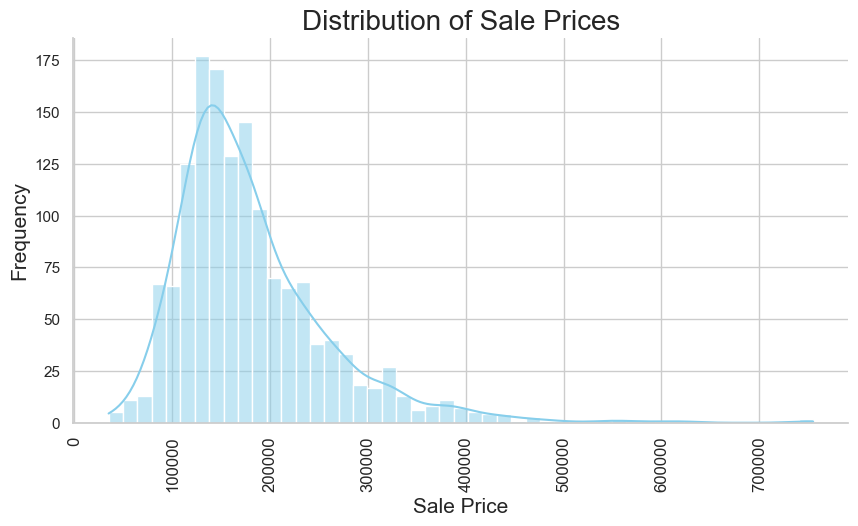

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(df['SalePrice'], kde=True, color='skyblue')
plt.title('Distribution of Sale Prices', fontsize=20)
plt.xlabel('Sale Price', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
sns.despine()

plt.show()

### Profiling

In [193]:
# from ydata_profiling import ProfileReport
# in case of error: pip install typing_extensions==4.7.1 --upgrade
# profile = ProfileReport(df, title="Profiling Report")

# profile.to_file("reports/data_report.html")

# Data Cleaning and Analysis

# Missing Values

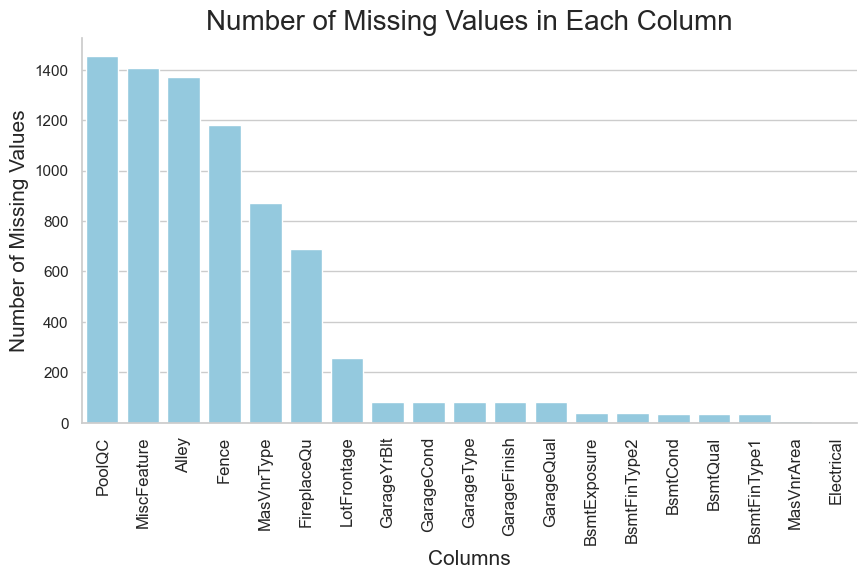

In [194]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]


sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_values.index, y=missing_values.values, color='skyblue')

plt.title('Number of Missing Values in Each Column', fontsize=20)
plt.xlabel('Columns', fontsize=15)
plt.ylabel('Number of Missing Values', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
sns.despine()
plt.show()

PoolQC            1453    – code as 'absence'
MiscFeature       1406    – code as 'absence'
Alley             1369    – code as 'absence'
Fence             1179    – code as 'absence'
MasVnrType        872     – code as 'absence'
FireplaceQu       690     – code as 'absence'
GarageType        81      – code as 'absence'
GarageCond        81      – code as 'absence'
GarageFinish      81      – code as 'absence'
GarageQual        81      – code as 'absence'
BsmtFinType2      38      – code as 'absence'
BsmtExposure      38      – code as 'absence'
BsmtQual          37      – code as 'absence'
BsmtCond          37      – code as 'absence'
BsmtFinType1      37      – code as 'absence'

GarageYrBlt       81      – fill with YearBuilt

Electrical        1       – fill in with the most frequently occurring value in the column
MasVnrArea        8       – fill in with the most frequently occurring value in the column
LotFrontage       259     – fill in with the most frequently occurring value in the column

In [195]:
df = _fill_missing_values(df=df)

# Numerical Features Histograms

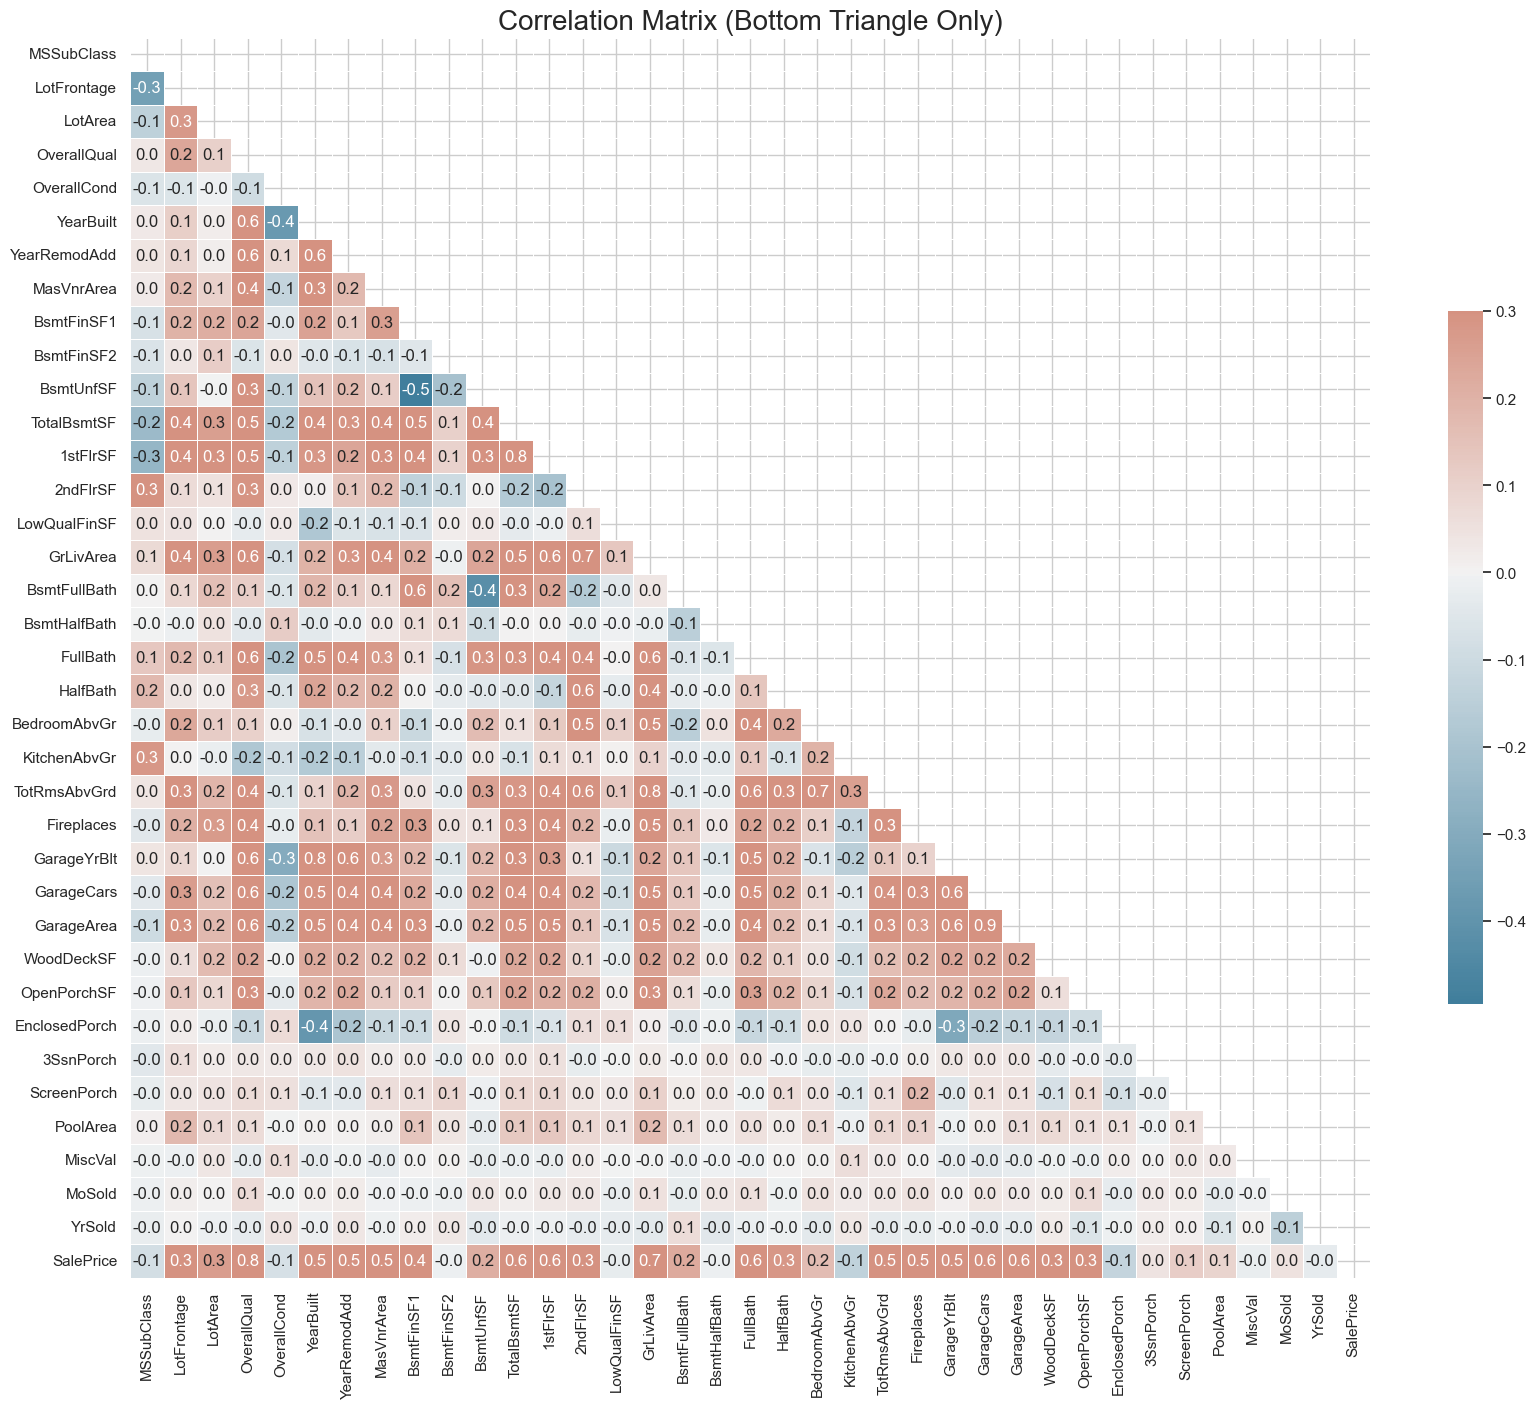

In [196]:

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 18))

# Generate a custom colormap with higher contrast
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".1f", 
            annot_kws={"size": 12}, xticklabels=1, yticklabels=1)

# Set the title
plt.title('Correlation Matrix (Bottom Triangle Only)', size=20)

# Show the plot
plt.show()

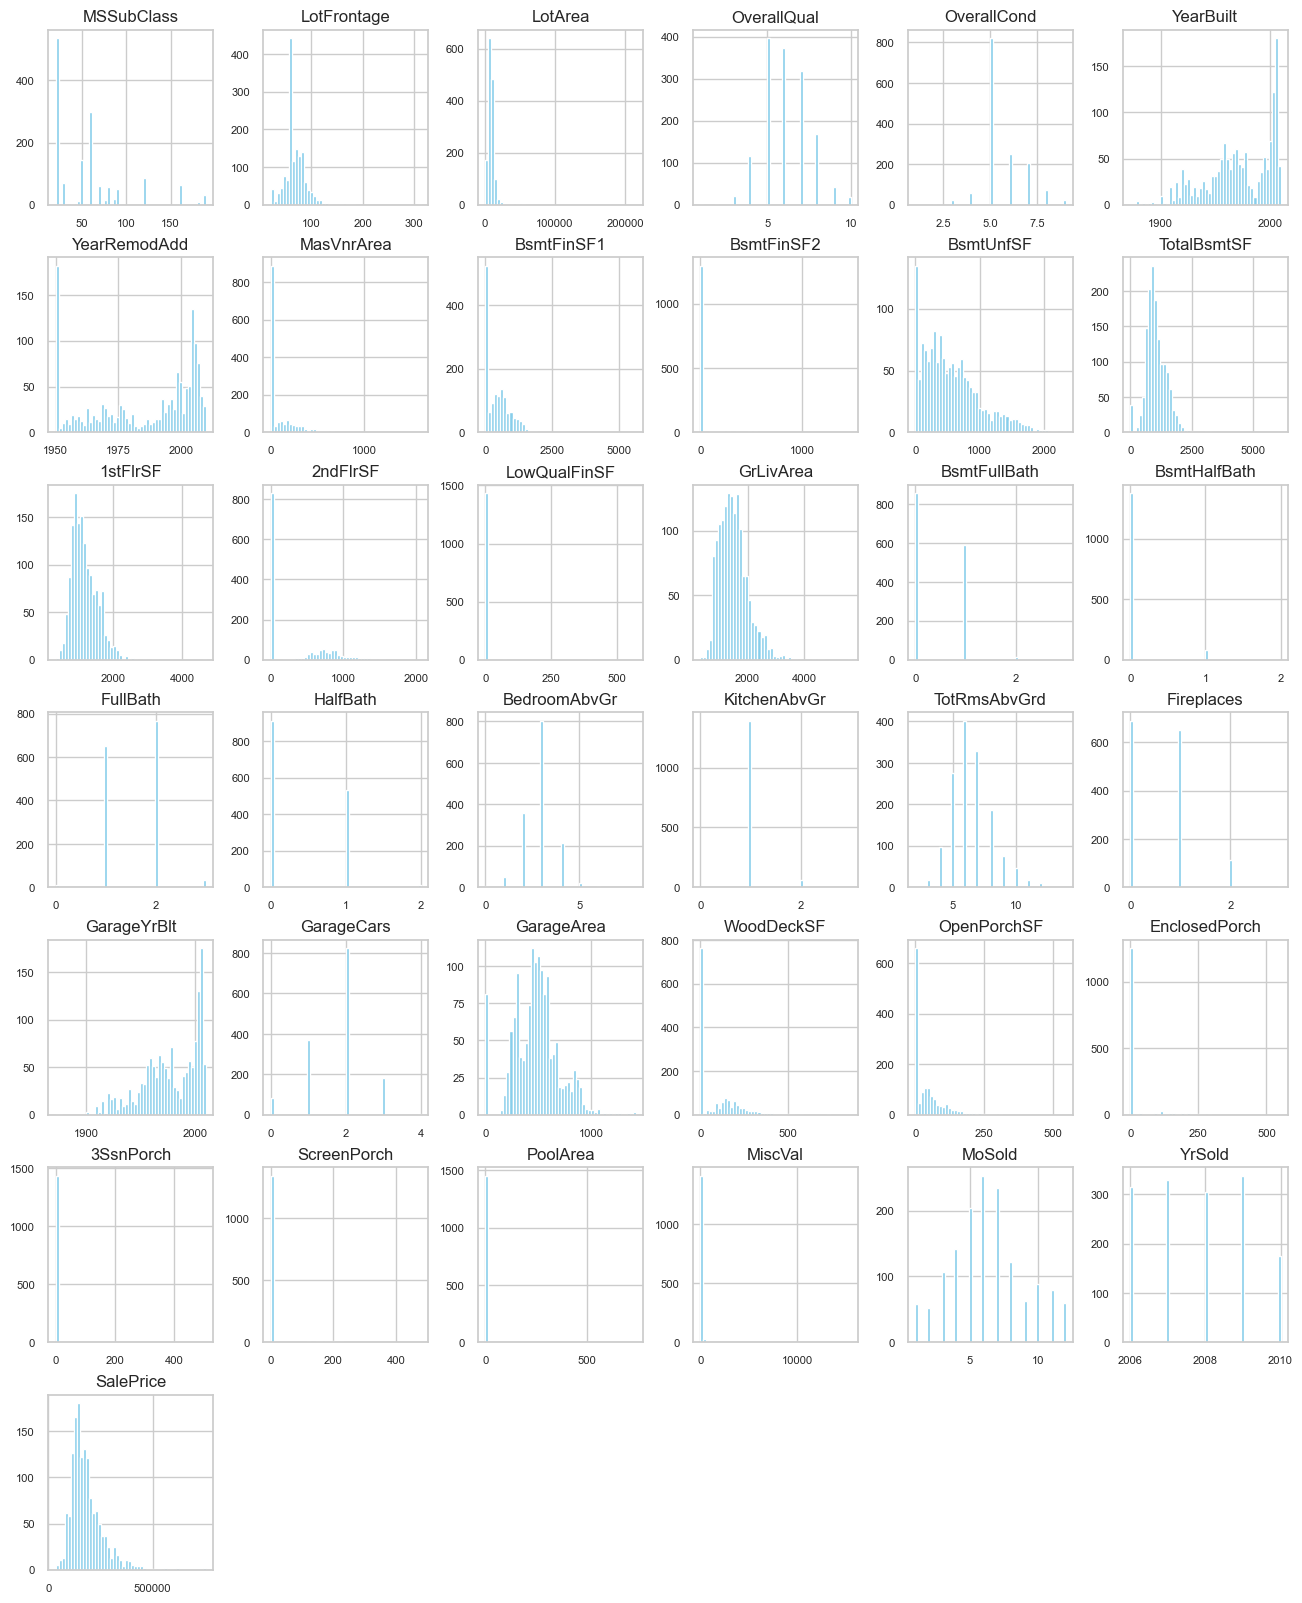

In [197]:
(df
    .select_dtypes(
        include=[np.number])
    .hist(
        figsize=(16, 20), 
        bins=50, 
        xlabelsize=8,
        ylabelsize=8,
        color='skyblue')
);

## Engineered Features 

In [198]:
df = _feature_engineering(df=df)

(0.0, 1.0, 0.0, 1.0)

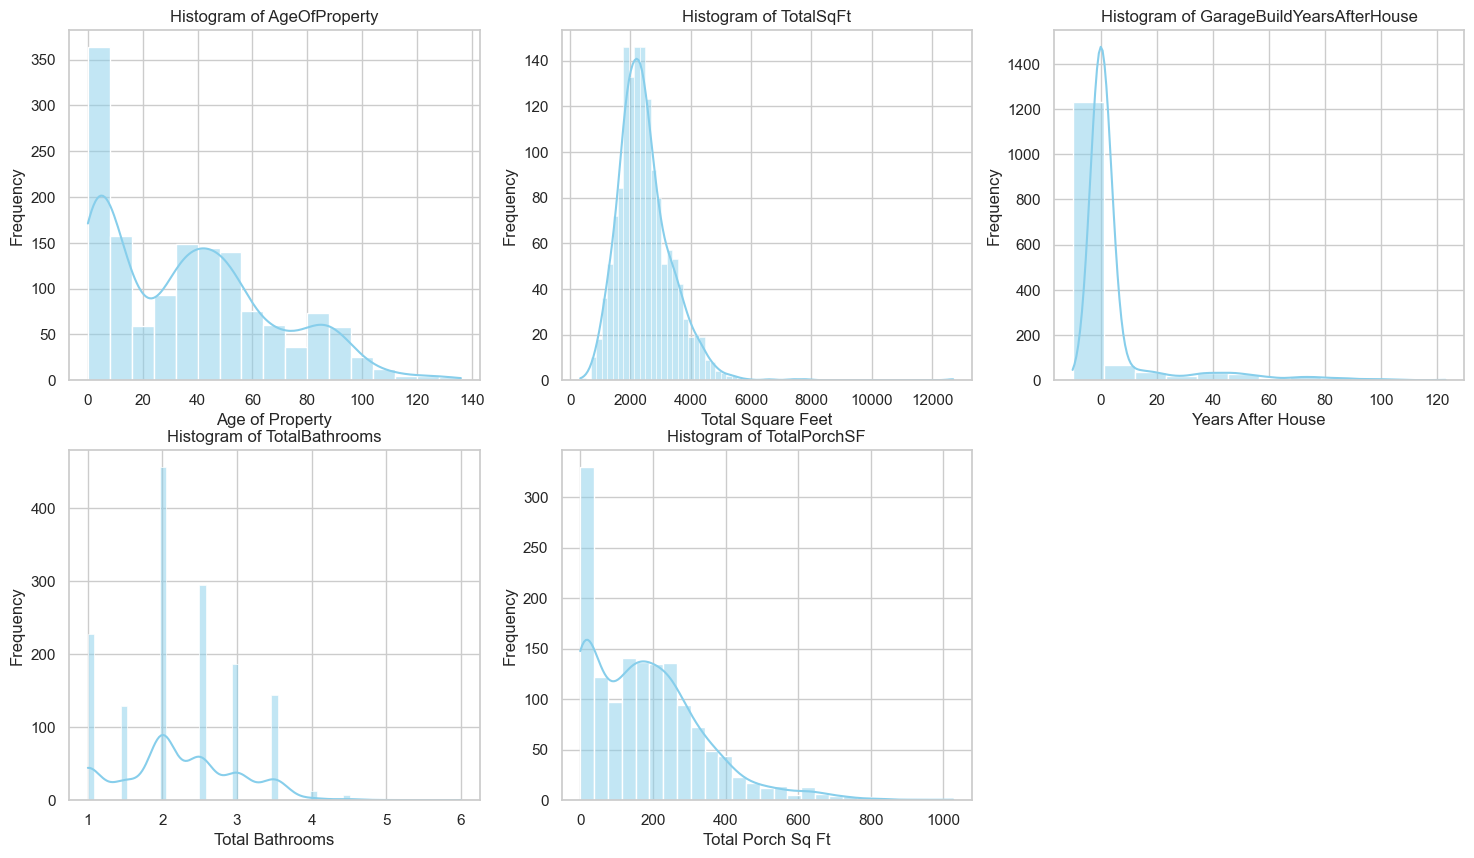

In [199]:
# Setting the style
sns.set(style="whitegrid")

# Creating figure and axes
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Histogram for 'AgeOfProperty'
sns.histplot(df['AgeOfProperty'], ax=axs[0, 0], color='skyblue', kde=True)
axs[0, 0].set_title('Histogram of AgeOfProperty')
axs[0, 0].set_xlabel('Age of Property')
axs[0, 0].set_ylabel('Frequency')

# Histogram for 'TotalSqFt'
sns.histplot(df['TotalSqFt'], ax=axs[0, 1], color='skyblue', kde=True)
axs[0, 1].set_title('Histogram of TotalSqFt')
axs[0, 1].set_xlabel('Total Square Feet')
axs[0, 1].set_ylabel('Frequency')

# Histogram for 'GarageBuildYearsAfterHouse'
sns.histplot(df['GarageBuildYearsAfterHouse'], ax=axs[0, 2], color='skyblue', kde=True)
axs[0, 2].set_title('Histogram of GarageBuildYearsAfterHouse')
axs[0, 2].set_xlabel('Years After House')
axs[0, 2].set_ylabel('Frequency')

# Histogram for 'TotalBathrooms'
sns.histplot(df['TotalBathrooms'], ax=axs[1, 0], color='skyblue', kde=True)
axs[1, 0].set_title('Histogram of TotalBathrooms')
axs[1, 0].set_xlabel('Total Bathrooms')
axs[1, 0].set_ylabel('Frequency')

# Histogram for 'TotalPorchSF'
sns.histplot(df['TotalPorchSF'], ax=axs[1, 1], color='skyblue', kde=True)
axs[1, 1].set_title('Histogram of TotalPorchSF')
axs[1, 1].set_xlabel('Total Porch Sq Ft')
axs[1, 1].set_ylabel('Frequency')

# Hide the last unused subplot
axs[1, 2].axis('off')

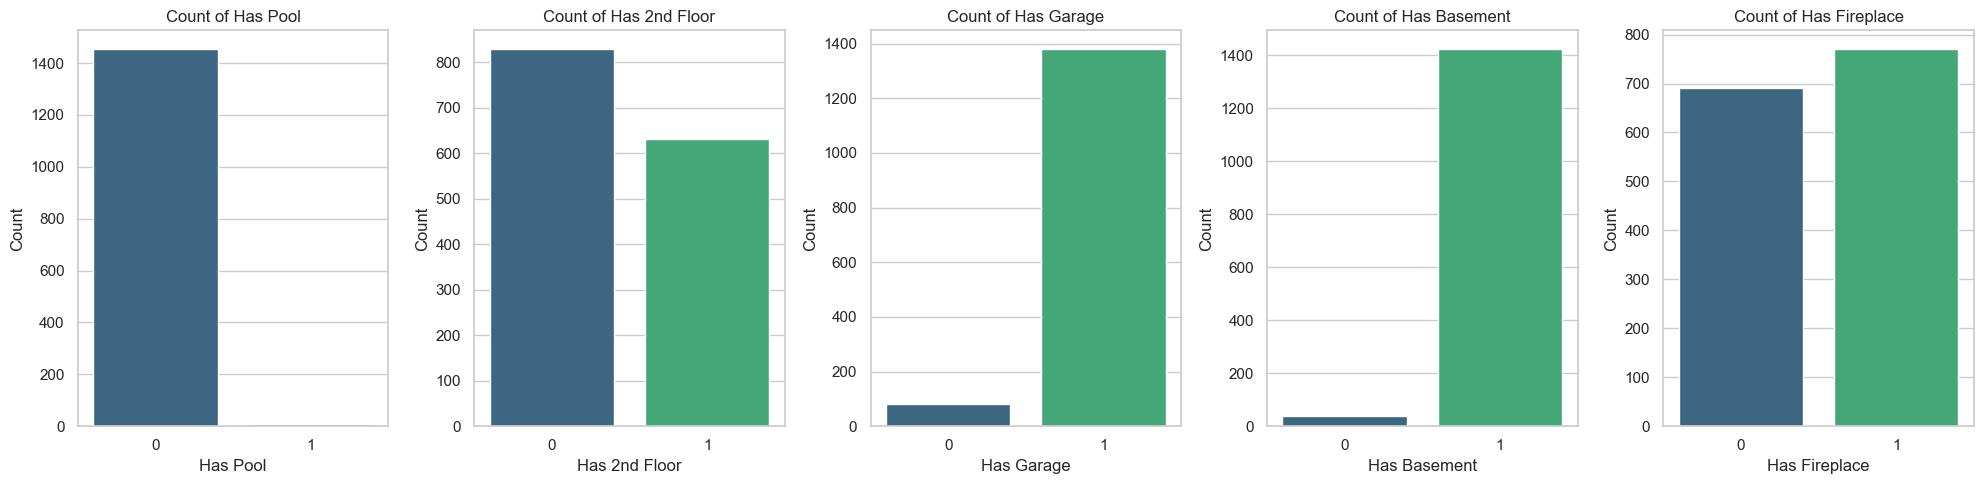

In [200]:
# Creating figure and axes for binary features
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

# Bar plot for 'haspool'
sns.countplot(x='haspool', data=df, ax=axs[0], palette='viridis', hue='haspool', legend=False)
axs[0].set_title('Count of Has Pool')
axs[0].set_xlabel('Has Pool')
axs[0].set_ylabel('Count')

# Bar plot for 'has2ndfloor'
sns.countplot(x='has2ndfloor', data=df, ax=axs[1], palette='viridis', hue='has2ndfloor', legend=False)
axs[1].set_title('Count of Has 2nd Floor')
axs[1].set_xlabel('Has 2nd Floor')
axs[1].set_ylabel('Count')

# Bar plot for 'hasgarage'
sns.countplot(x='hasgarage', data=df, ax=axs[2], palette='viridis', hue='hasgarage', legend=False)
axs[2].set_title('Count of Has Garage')
axs[2].set_xlabel('Has Garage')
axs[2].set_ylabel('Count')

# Bar plot for 'hasbsmt'
sns.countplot(x='hasbsmt', data=df, ax=axs[3], palette='viridis', hue='hasbsmt', legend=False)
axs[3].set_title('Count of Has Basement')
axs[3].set_xlabel('Has Basement')
axs[3].set_ylabel('Count')

# Bar plot for 'hasfireplace'
sns.countplot(x='hasfireplace', data=df, ax=axs[4], palette='viridis', hue='hasfireplace', legend=False)
axs[4].set_title('Count of Has Fireplace')
axs[4].set_xlabel('Has Fireplace')
axs[4].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

In [201]:
df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,AgeOfProperty,TotalSqFt,GarageBuildYearsAfterHouse,TotalBathrooms,TotalPorchSF,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
0,60,RL,65.0,8450,Pave,Absence,Reg,Lvl,AllPub,Inside,...,5,2964,0.0,3.5,61,0,1,1,1,0
1,20,RL,80.0,9600,Pave,Absence,Reg,Lvl,AllPub,FR2,...,31,2700,0.0,2.5,298,0,0,1,1,1
2,60,RL,68.0,11250,Pave,Absence,IR1,Lvl,AllPub,Inside,...,7,2880,0.0,3.5,42,0,1,1,1,1


In [202]:
## OneHot Encoded Features
df = _one_hot_encoding(df=df)

In [203]:
df.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Loading Data

## Data split - Train & Test

In [206]:
from data_utils import load_training_data

x_train, x_test, y_train, y_test = load_training_data(feature_engineering=True)

x_train.shape[0]=1168, x_test.shape[0]=292
y_train.shape[0]=1168, y_test.shape[0]=292


## Regression Modeling

In [207]:
import xgboost as xgb

xgb_regressor = xgb.XGBRegressor(objective ='reg:squarederror',
                                 max_depth = 2,
                                 alpha = 0.8298,
                                 random_state=0,
                                 n_estimators=3407,
                                 learning_rate=0.0377,
                                 min_child_weight=0.4565,
                                 subsample=0.9964,
                                 reg_lambda=0.0316,
                                 gamma=0.0009,
                                 colsample_bytree=0.2308,
                                 nthread=-1)

xgb_regressor.fit(x_train, y_train)

XGBRegressor(alpha=0.8298, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.2308, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.0009, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.0377, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=0.4565, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=3407, n_jobs=None, nthread=-1, ...)

In [208]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
import numpy as np

xgby_pred = xgb_regressor.predict(x_test)

# Calculate R²
r2 = r2_score(y_test, xgby_pred)
print(f'XGBoost - R²: {r2}')

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, xgby_pred)
print(f'XGBoost - MAPE: {mape}')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, xgby_pred))
print(f'XGBoost - RMSE: {rmse}')

XGBoost - R²: 0.9241492748260498
XGBoost - MAPE: 0.08612523717346343
XGBoost - RMSE: 23258.60943433299
